## Visualizing Tech Stocks

Analyzing and visualizing the top 5 highest valued technology stocks during the six months from January through June 2019. Based on the calculations choose the best option to invest in and ideas for portfolio diversification.

The top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, Matplotlib, and Seaborn taking a visual look into the similarities and differences between these stocks:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Calculate and visualize the correlations between the tech stocks

The project was made for Codecademy 'Analyze Financial Data with Python' course, but exploring financial analysis with Python further I decided to add the 7th task: Calculate moving averages of the chosen stock and plot candlestick chart using Plotly.

### Preparation: import packages and download data

In [3]:
# import data manipulation packages
import pandas as pd
import numpy as np

In [4]:
# import API package
import pandas_datareader as web

In [5]:
#Import Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Define Stocks
symbols = ["MSFT", "AMZN", "AAPL", "GOOG", "FB"]

# Create Dates
start_date = "2019-01-01"
end_date = "2019-07-01"

# Retrieve Data
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

#View Data
stock_data.head()

Attributes   Adj Close                                                    \
Symbols           AAPL         AMZN          FB         GOOG        MSFT   
Date                                                                       
2019-01-02  154.794983  1539.130005  135.679993  1045.849976   99.375191   
2019-01-03  139.376251  1500.280029  131.740005  1016.059998   95.719376   
2019-01-04  145.326126  1575.390015  137.949997  1070.709961  100.171211   
2019-01-07  145.002686  1629.510010  138.050003  1068.390015  100.298965   
2019-01-08  147.766861  1656.579956  142.529999  1076.280029  101.026199   

Attributes       Close                                                    ...  \
Symbols           AAPL         AMZN          FB         GOOG        MSFT  ...   
Date                                                                      ...   
2019-01-02  157.919998  1539.130005  135.679993  1045.849976  101.120003  ...   
2019-01-03  142.190002  1500.280029  131.740005  1016.059998   97.400002  ...   
2019-01-04  148.259995  1575.390015  137.949997  1070.709961  101.930000  ...   
2019-01-07  147.929993  1629.510010  138.050003  1068.390015  102.059998  ...   
2019-01-08  150.750000  1656.579956  142.529999  1076.280029  102.800003  ...   

Attributes        Open                                                    \
Symbols           AAPL         AMZN          FB         GOOG        MSFT   
Date                                                                       
2019-01-02  154.889999  1465.199951  128.990005  1016.570007   99.550003   
2019-01-03  143.979996  1520.010010  134.690002  1041.000000  100.099998   
2019-01-04  144.529999  1530.000000  134.009995  1032.589966   99.720001   
2019-01-07  148.699997  1602.310059  137.559998  1071.500000  101.639999   
2019-01-08  149.559998  1664.689941  139.889999  1076.109985  103.040001   

Attributes      Volume                                                
Symbols           AAPL       AMZN          FB       GOOG        MSFT  
Date                                                                  
2019-01-02  37039700.0  7983100.0  28146200.0  1532600.0  35329300.0  
2019-01-03  91312200.0  6975600.0  22717900.0  1841100.0  42579100.0  
2019-01-04  58607100.0  9182600.0  29002100.0  2093900.0  44060600.0  
2019-01-07  54777800.0  7993200.0  20089300.0  1981900.0  35656100.0  
2019-01-08  41025300.0  8881400.0  26263800.0  1764900.0  31514400.0  

[5 rows x 30 columns]

In [7]:
stock_data['Adj Close'].head()

Symbols           AAPL         AMZN          FB         GOOG        MSFT
Date                                                                    
2019-01-02  154.794983  1539.130005  135.679993  1045.849976   99.375191
2019-01-03  139.376251  1500.280029  131.740005  1016.059998   95.719376
2019-01-04  145.326126  1575.390015  137.949997  1070.709961  100.171211
2019-01-07  145.002686  1629.510010  138.050003  1068.390015  100.298965
2019-01-08  147.766861  1656.579956  142.529999  1076.280029  101.026199

### Plot of the Adjusted Closing Prices over Time

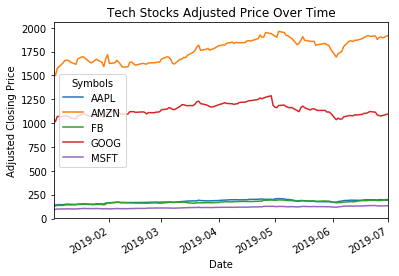

In [13]:
# ploting the adjusted closing prices of each stock over time with default style
stock_data['Adj Close'].plot()
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Tech Stocks Adjusted Price Over Time')
plt.savefig('adjclose1')
plt.show()

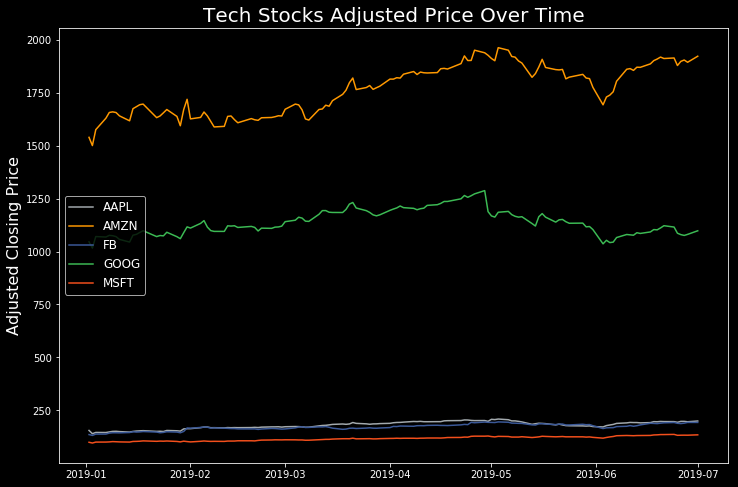

In [44]:
#styling the plot using dark background and company colors

adj = stock_data['Adj Close']
plt.style.use('dark_background')

fig = plt.figure(figsize=(12,8))

plt.plot(adj.AAPL,color="#A3AAAE")
plt.plot(adj.AMZN,color="#FF9900")
plt.plot(adj.FB,color="#3B5998")
plt.plot(adj.GOOG,color="#3cba54")
plt.plot(adj.MSFT,color="#F34F1C")

plt.ylabel('Adjusted Closing Price', fontsize=16)
plt.title('Tech Stocks Adjusted Price Over Time', fontsize=20)
plt.legend(stock_data['Adj Close'].columns,loc='center left', fontsize=12)
plt.savefig('adjclose_2')
plt.show()

### The Daily Simple Rate of Return Over Time

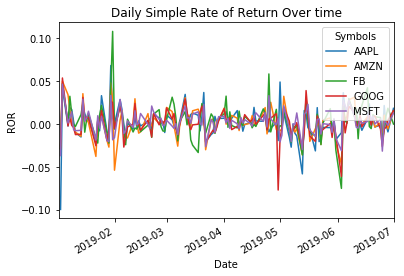

In [7]:
stock_data['Adj Close'].pct_change().plot()
plt.xlabel('Date')
plt.ylabel('ROR')
plt.title('Daily Simple Rate of Return Over time')
plt.show()

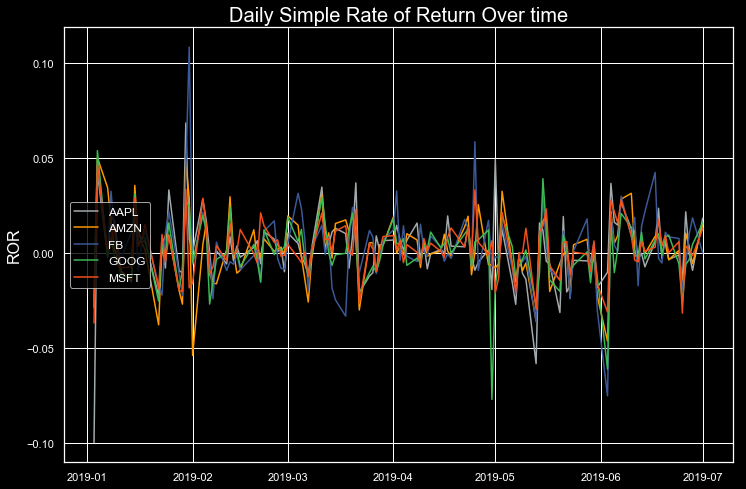

In [81]:
fig = plt.figure(figsize=(12,8))
plt.style.use('dark_background')
plt.plot(adj.AAPL.pct_change(),color="#A3AAAE")
plt.plot(adj.AMZN.pct_change(),color="#FF9900")
plt.plot(adj.FB.pct_change(),color="#3B5998")
plt.plot(adj.GOOG.pct_change(),color="#3cba54")
plt.plot(adj.MSFT.pct_change(),color="#F34F1C")

plt.ylabel('ROR', fontsize=16)
plt.title('Daily Simple Rate of Return Over time', fontsize=20)
plt.legend(stock_data['Adj Close'].columns,loc='center left', fontsize=12)
plt.savefig('adjclose_4')
plt.show()

### Subplots of daily simple rate of return

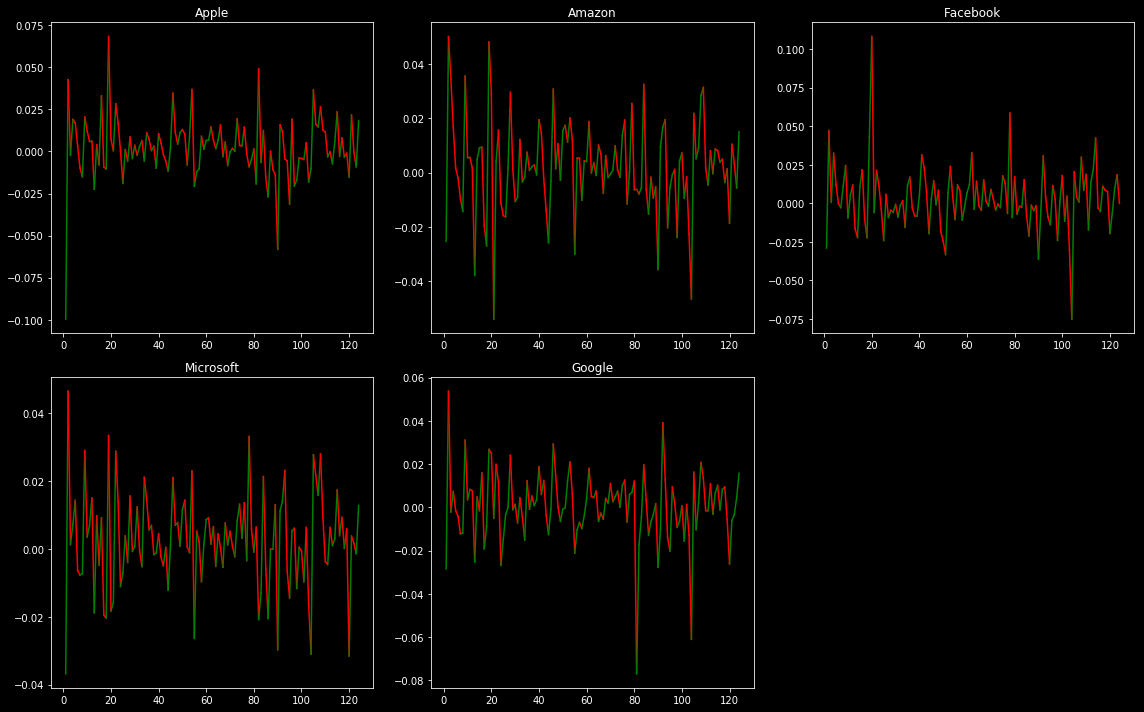

In [50]:
fig = plt.figure(figsize=(16,10))

plt.subplot(2,3,1)
x = range(len(stock_data['Adj Close']['AAPL'].pct_change()))
y = stock_data['Adj Close']['AAPL'].pct_change()
for x1, x2, y1,y2 in zip(x, x[1:], y, y[1:]):
    if y1 > y2:
        plt.plot([x1, x2], [y1, y2], 'r')
    elif y1 < y2:
        plt.plot([x1, x2], [y1, y2], 'g')
    else:
        plt.plot([x1, x2], [y1, y2], 'b')
plt.title("Apple")


plt.subplot(2,3,2)
x = range(len(stock_data['Adj Close']['AMZN'].pct_change()))
y = stock_data['Adj Close']['AMZN'].pct_change()
for x1, x2, y1,y2 in zip(x, x[1:], y, y[1:]):
    if y1 > y2:
        plt.plot([x1, x2], [y1, y2], 'r')
    elif y1 < y2:
        plt.plot([x1, x2], [y1, y2], 'g')
    else:
        plt.plot([x1, x2], [y1, y2], 'b')
plt.title("Amazon")

plt.subplot(2,3,3)
x = range(len(stock_data['Adj Close']['FB'].pct_change()))
y = stock_data['Adj Close']['FB'].pct_change()
for x1, x2, y1,y2 in zip(x, x[1:], y, y[1:]):
    if y1 > y2:
        plt.plot([x1, x2], [y1, y2], 'r')
    elif y1 < y2:
        plt.plot([x1, x2], [y1, y2], 'g')
    else:
        plt.plot([x1, x2], [y1, y2], 'b')
plt.title("Facebook")

plt.subplot(2,3,4)
x = range(len(stock_data['Adj Close']['MSFT'].pct_change()))
y = stock_data['Adj Close']['MSFT'].pct_change()
for x1, x2, y1,y2 in zip(x, x[1:], y, y[1:]):
    if y1 > y2:
        plt.plot([x1, x2], [y1, y2], 'r')
    elif y1 < y2:
        plt.plot([x1, x2], [y1, y2], 'g')
    else:
        plt.plot([x1, x2], [y1, y2], 'b')
plt.title("Microsoft")

plt.subplot(2,3,5)
x = range(len(stock_data['Adj Close']['GOOG'].pct_change()))
y = stock_data['Adj Close']['GOOG'].pct_change()
for x1, x2, y1,y2 in zip(x, x[1:], y, y[1:]):
    if y1 > y2:
        plt.plot([x1, x2], [y1, y2], 'r')
    elif y1 < y2:
        plt.plot([x1, x2], [y1, y2], 'g')
    else:
        plt.plot([x1, x2], [y1, y2], 'b')
plt.title("Google")

plt.tight_layout()
plt.show()

### The Mean of Daily Simple Rate of Return

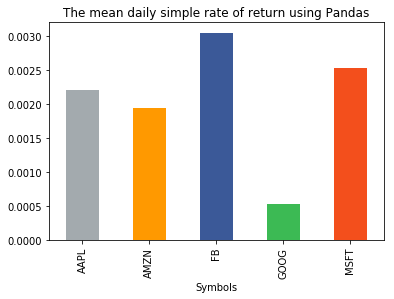

In [8]:
# calculate mean rate of return
mean_return_d = stock_data['Adj Close'].pct_change().mean()

#bar chart using pandas
mean_return_d.plot.bar(title='The mean daily simple rate of return using Pandas', 
                       color=["#A3AAAE","#FF9900","#3B5998","#3cba54","#F34F1C"])

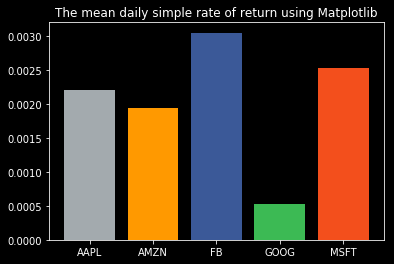

In [54]:
#plotting a bar chart using matpotlib
plt.bar(stock_data['Adj Close'].columns,mean_return_d,color=["#A3AAAE","#FF9900","#3B5998","#3cba54","#F34F1C"])

plt.title('The mean daily simple rate of return using Matplotlib')

plt.show()

In [19]:
print('Based on the mean rate of return Facebook would be the best option to invest in. It has  the highest mean simple rate of return over the evaluated period')

Based on the mean rate of return Facebook would be the best option to invest in. It has  the highest mean simple rate of return over the evaluated period


### The variance

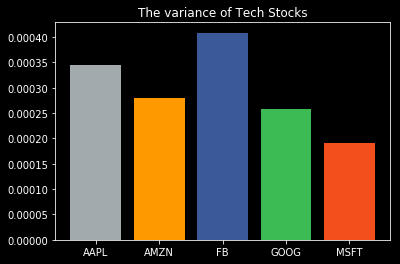

In [55]:
plt.bar(stock_data['Adj Close'].columns,stock_data['Adj Close'].pct_change().var(),color=["#A3AAAE","#FF9900","#3B5998","#3cba54","#F34F1C"])

plt.title('The variance of Tech Stocks')

plt.show()

In [21]:
print('Based on variance Facebook would be the riskiest to invest in, since it has the highest variance')

Based on variance Facebook would be the riskiest to invest in, since it has the highest variance


### The standard deviation

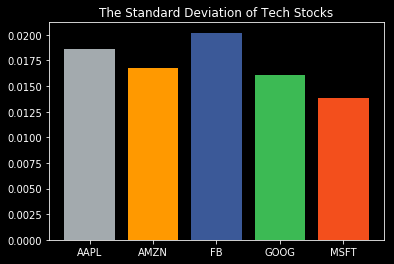

In [56]:
plt.bar(stock_data['Adj Close'].columns,stock_data['Adj Close'].pct_change().std(),color=["#A3AAAE","#FF9900","#3B5998","#3cba54","#F34F1C"])

plt.title('The Standard Deviation of Tech Stocks')

plt.show()

In [24]:
print('Based on all availible information I would choose Microsoft. It has the least standard deviation and it comes second in terms of daily returns')

Based on all availible information I would choose Microsoft. It has the least standard deviation and it comes second in terms of daily returns


### Correlation

In [57]:
stock_data['Adj Close'].pct_change().corr()

Symbols      AAPL      AMZN        FB      GOOG      MSFT
Symbols                                                  
AAPL     1.000000  0.610110  0.438760  0.569773  0.652943
AMZN     0.610110  1.000000  0.572073  0.721504  0.731493
FB       0.438760  0.572073  1.000000  0.633440  0.454094
GOOG     0.569773  0.721504  0.633440  1.000000  0.636987
MSFT     0.652943  0.731493  0.454094  0.636987  1.000000

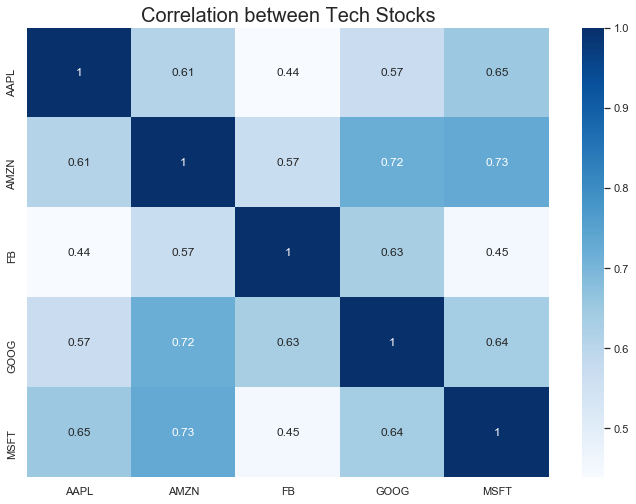

In [84]:
import seaborn as sns

# build heatmap using seaborn library

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=stock_data['Adj Close'].pct_change().corr(),annot=True,cmap='Blues')
#sns.set_style("darkgrid")
plt.title('Correlation between Tech Stocks',fontsize=20, y=1.2)
plt.ylabel('')    
plt.xlabel('')
plt.show()

In [85]:
print("""All companies are positive correlates, which is logical since they represent the same industry
To diversify portfolio:
Microsoft is highly correlated with Amazon, so it would not be the best choice.
Microsoft and Facebook have the least correlation, and Facebook has the highest rate of return. For the riskier investor that would be the best option.
Alternatively, Apple could be chosen. Google and Apple have close variations, but Apple has a significantly higher return.""")

All companies are positive correlates, which is logical since they represent the same industry
To diversify portfolio:
Microsoft is highly correlated with Amazon, so it would not be the best choice.
Microsoft and Facebook have the least correlation, and Facebook has the highest rate of return. For the riskier investor that would be the best option.
Alternatively, Apple could be chosen. Google and Apple have close variations, but Apple has a significantly higher return.


## Microsoft Portfolio Visualisation

In [40]:
import plotly.graph_objects as go
# Retrieve Data
msft = web.get_data_yahoo('MSFT', start_date, end_date)

#accesing dates
df_dates=msft.index.to_frame().reset_index(drop=True)

In [48]:
#plot a candlestick chart using Plotly

msft_stocks = {
    'x': df_dates['Date'],
    'open': msft['Open'],
    'close': msft['Close'],
    'high': msft['High'],
    'low': msft['Low'],
    'type': 'candlestick',
    'name': 'MSFT',
    'showlegend': False
}


layout = go.Layout({
    'title': {
        'text': 'Microsoft Candlesticks Chart',
        'font': {
            'size': 15
        }
    }
})

fig = go.Figure(data=msft_stocks, layout=layout)

fig.show()

In [45]:
#adding moving averages

msft_stocks = {
    'x': df_dates['Date'],
    'open': msft['Open'],
    'close': msft['Close'],
    'high': msft['High'],
    'low': msft['Low'],
    'type': 'candlestick',
    'name': 'MSFT',
    'showlegend': False
}

# Calculate and define moving average of 30 periods
avg_30 = msft.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods
avg_50 = msft.Close.rolling(window=50, min_periods=1).mean()


m_avg30 = {
    'x': df_dates['Date'],
    'y': avg_30,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}

m_avg50 = {
    'x': df_dates['Date'],
    'y': avg_50,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}


data = [msft_stocks, m_avg30, m_avg50]
# Config graph layout
layout = go.Layout({
    'title': {
        'text': 'Microsoft Candlesticks Chart with Moving Averages',
        'font': {
            'size': 15
        }
    }
})

fig = go.Figure(data=data, layout=layout)

fig.show()